In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 直方图


In [3]:
img= cv2.imread('cat.jpg')

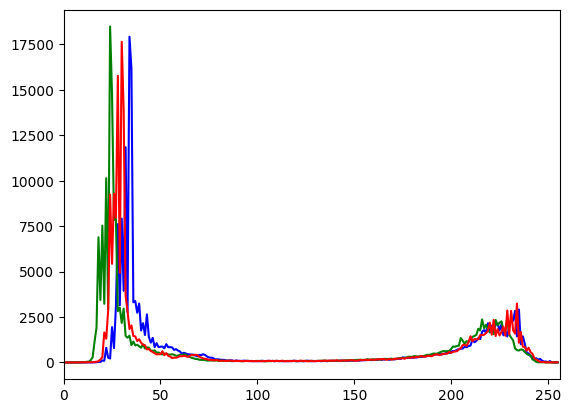

In [4]:
color= ["b","g","r"]
for i, col in enumerate(color):
    histr= cv2.calcHist([img],[i],None,[256],[0,256]) # 注意参数都要放进中括号. None表示不使用mask选择范围
    plt.plot(histr,color=col)
    plt.xlim([0,256])


### mask操作

In [8]:
img.shape

(366, 550, 3)

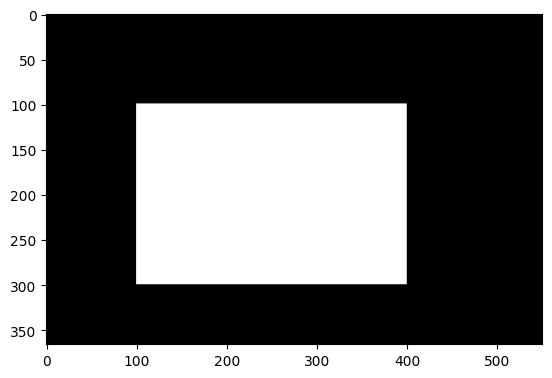

In [9]:
mask= np.zeros(img.shape[:2], dtype=np.uint8)
mask[100:300, 100:400]= 255
plt.imshow(mask, cmap='gray')

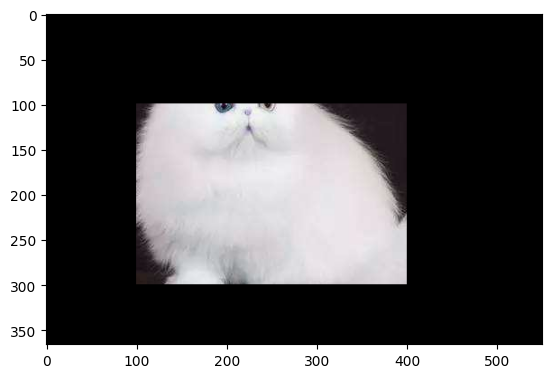

In [ ]:
# 与操作用mask抽取图像
masked_img= cv2.bitwise_and(img, img, mask=mask) # src1, src2, mask, src1 and sr2 can be different images。此时把图像的每个像素点值转化为二进制，然后进行and操作
plt.imshow(masked_img)

In [13]:
hist_full= cv2.calcHist([img],[0],None,[256],[0,256])
hist_masked= cv2.calcHist([img],[0],mask,[256],[0,256])

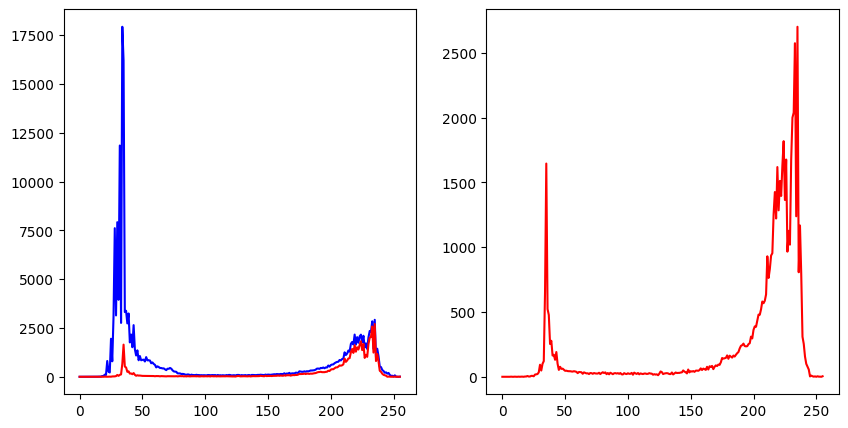

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(hist_full, color='b')
axs[0].plot(hist_masked, color='r')
axs[1].plot(hist_masked, color='r')

### 均衡化效果
- 全局均衡化<br>
    根据累积分布来均衡化
- 自适应直方图均衡化(将图片分割成几个区域)

In [21]:
img= cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

In [22]:

equ= cv2.equalizeHist(img)

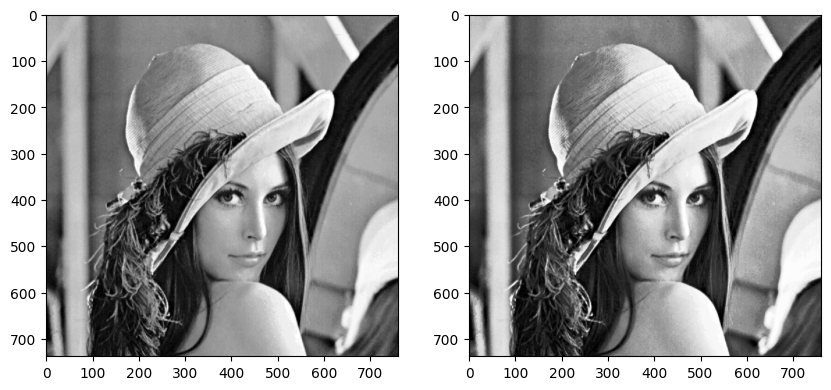

In [23]:
fig, axs= plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(equ, cmap='gray') 

In [24]:
# CLAHE stands for Contrast Limited Adaptive Histogram Equalization, a way to improve the contrast of images.
clahe= cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)) # clipLimit is the contrast limit for local areas, tileGridSize is the size of the grid for histogram equalization
clahe_img= clahe.apply(img)

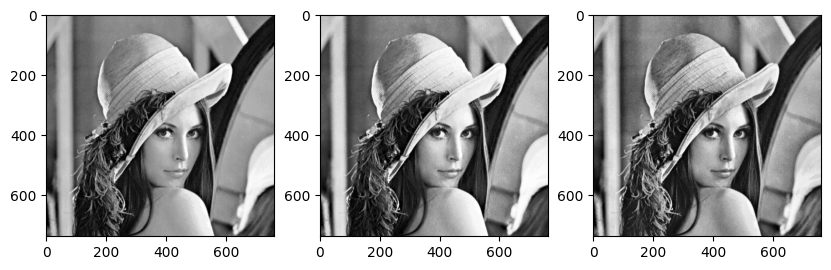

In [25]:
fig, axs= plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(equ, cmap='gray') 
axs[2].imshow(clahe_img, cmap='gray')

### 傅里叶变换
- 可以想象一副图像是由很多个不同方向的波所组成的，就像一片大海

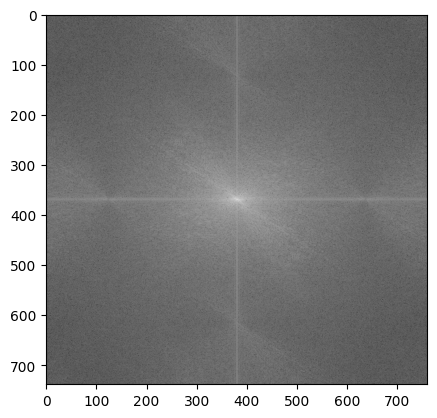

In [7]:
# 读取图像
img= cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# 将图片转换成32bit格式
img_float32= np.float32(img)

# 将图片进行傅里叶转换
# dft是discrete flourier transformation
# DFT_COMPLEX_OUTPUT会返回complex结果，即有实部和虚部
dft= cv2.dft(img_float32, flags= cv2.DFT_COMPLEX_OUTPUT)
# 将低频域移动图像中间
dft_shift= np.fft.fftshift(dft)
# 将变换结果重新逆转换回灰度图能表示的形式
magnitude_spectrum= 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) # 20*np.log是为了将转换值的range调整到0到255之间。

plt.imshow(magnitude_spectrum, cmap="gray")

### 高通滤波器，低通滤波器

In [11]:
# 计算频域图的中心位置
rows, cols= img.shape
crow, ccol= int(rows/2), int(cols/2)

# 高通滤波mask
mask= np.ones((rows, cols, 2), np.int8)
mask[crow-30:crow+30, ccol-30:ccol+30]= 0

# IDFT
fshift= dft_shift*mask    
f_ishift= np.fft.ifftshift(fshift)
img_back= cv2.idft(f_ishift)
img_back= cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

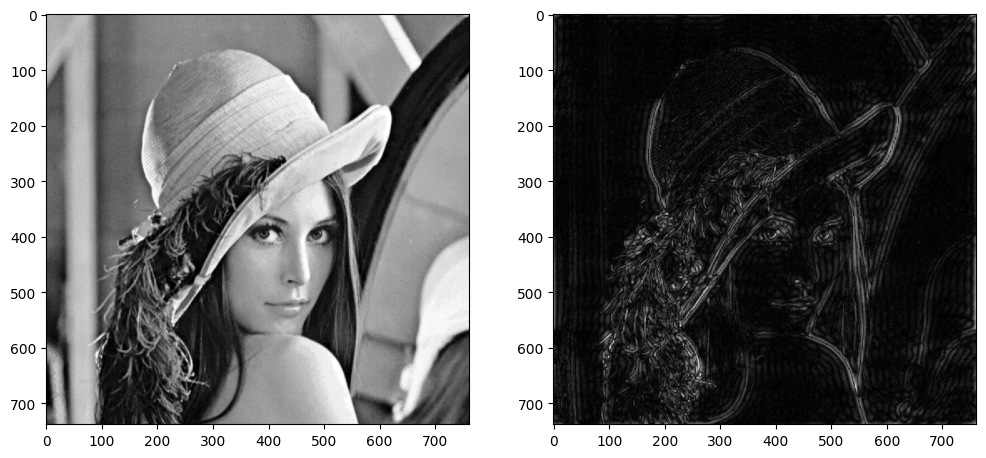

In [22]:
fig, axs= plt.subplots(1, 2, figsize=(12,6))
axs[0].imshow(img, cmap="gray")
axs[1].imshow(img_back, cmap="gray")